# 0. Student Info & Pre Process

108205068<br>
財政四乙<br>
張簡宇庭<br>

In [109]:
!pip install pm4py==2.7.5

In [110]:
import pm4py
import pandas as pd
import matplotlib.pyplot as plt
import requests
r = requests.get("https://github.com/chihduo/pmlab/raw/main/2023/script/utils.py")
with open("utils.py", "w") as f:
  f.write(r.text)
import utils

# 1. Patient treatment

1. Describe the most frequent case variants in this process. (1 point)

2. Which parts of the process get repeated? What are the most
frequent loops? (1 point)

3. What is/are the main differences between *Release B* and other types of patient releases (*Release A, C, D*, etc.)? (2 points)

In [ ]:
df = pd.read_csv("https://github.com/chihduo/pmlab/raw/main/2023/data/sepsis.csv", sep = ",")
df.head(5)

Case ID         Activity       Complete Timestamp     Variant  \
0       A  ER Registration  2014/10/22 12:15:41.000  Variant 63   
1       A       Leucocytes  2014/10/22 12:27:00.000  Variant 63   
2       A              CRP  2014/10/22 12:27:00.000  Variant 63   
3       A       LacticAcid  2014/10/22 12:27:00.000  Variant 63   
4       A        ER Triage  2014/10/22 12:33:37.000  Variant 63   

   Variant index   Age   CRP Diagnose DiagnosticArtAstrup DiagnosticBlood  \
0             63  85.0   NaN        A                True            True   
1             63   NaN   NaN      NaN                 NaN             NaN   
2             63   NaN  21.0      NaN                 NaN             NaN   
3             63   NaN   NaN      NaN                 NaN             NaN   
4             63   NaN   NaN      NaN                 NaN             NaN   

   ... LacticAcid Leucocytes Oligurie SIRSCritHeartRate SIRSCritLeucos  \
0  ...        NaN        NaN    False              True          False   
1  ...        NaN        9.6      NaN               NaN            NaN   
2  ...        NaN        NaN      NaN               NaN            NaN   
3  ...        2.2        NaN      NaN               NaN            NaN   
4  ...        NaN        NaN      NaN               NaN            NaN   

  SIRSCritTachypnea SIRSCritTemperature SIRSCriteria2OrMore  \
0              True                True                True   
1               NaN                 NaN                 NaN   
2               NaN                 NaN                 NaN   
3               NaN                 NaN                 NaN   
4               NaN                 NaN                 NaN   

  lifecycle:transition org:group  
0             complete         A  
1             complete         B  
2             complete         B  
3             complete         B  
4             complete         C  

[5 rows x 34 columns]

In [ ]:
# TODO: convert the timestamp fields to the Datetime datatype

df['Complete Timestamp'] = pd.to_datetime(df['Complete Timestamp'])

In [ ]:
df = pm4py.format_dataframe(df, case_id="Case ID",activity_key="Activity", timestamp_key="Complete Timestamp")
df.head(5)

Case ID         Activity  Complete Timestamp     Variant  Variant index  \
0       A  ER Registration 2014-10-22 12:15:41  Variant 63             63   
1       A       Leucocytes 2014-10-22 12:27:00  Variant 63             63   
2       A              CRP 2014-10-22 12:27:00  Variant 63             63   
3       A       LacticAcid 2014-10-22 12:27:00  Variant 63             63   
4       A        ER Triage 2014-10-22 12:33:37  Variant 63             63   

    Age   CRP Diagnose DiagnosticArtAstrup DiagnosticBlood  ...  \
0  85.0   NaN        A                True            True  ...   
1   NaN   NaN      NaN                 NaN             NaN  ...   
2   NaN  21.0      NaN                 NaN             NaN  ...   
3   NaN   NaN      NaN                 NaN             NaN  ...   
4   NaN   NaN      NaN                 NaN             NaN  ...   

  SIRSCritTachypnea SIRSCritTemperature SIRSCriteria2OrMore  \
0              True                True                True   
1               NaN                 NaN                 NaN   
2               NaN                 NaN                 NaN   
3               NaN                 NaN                 NaN   
4               NaN                 NaN                 NaN   

  lifecycle:transition org:group case:concept:name     concept:name  \
0             complete         A                 A  ER Registration   
1             complete         B                 A       Leucocytes   
2             complete         B                 A              CRP   
3             complete         B                 A       LacticAcid   
4             complete         C                 A        ER Triage   

       time:timestamp @@index @@case_index  
0 2014-10-22 12:15:41       0            0  
1 2014-10-22 12:27:00       1            0  
2 2014-10-22 12:27:00       2            0  
3 2014-10-22 12:27:00       3            0  
4 2014-10-22 12:33:37       4            0  

[5 rows x 39 columns]

## Ans for section 1



In [ ]:
## 1. Describe the most frequent case variants in this process. (1 point)
k1 = 1
df_top_k1 = pm4py.filtering.filter_variants_top_k(df, k1)
for cv in pm4py.stats.get_variants(df_top_k1).keys():
  print(cv)

('ER Registration', 'ER Triage', 'ER Sepsis Triage')


In [ ]:
## 2. Which parts of the process get repeated? What are the most frequent loops? (1 point)

for cv in pm4py.stats.get_variants(df).keys():
  print(cv)

('ER Registration', 'Leucocytes', 'CRP', 'LacticAcid', 'ER Triage', 'ER Sepsis Triage', 'IV Liquid', 'IV Antibiotics', 'Admission NC', 'CRP', 'Leucocytes', 'Leucocytes', 'CRP', 'Leucocytes', 'CRP', 'CRP', 'Leucocytes', 'Leucocytes', 'CRP', 'CRP', 'Leucocytes', 'Release A')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'LacticAcid', 'CRP', 'IV Liquid', 'IV Antibiotics')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'IV Liquid', 'Leucocytes', 'CRP', 'LacticAcid', 'IV Antibiotics', 'Admission NC', 'Release A', 'Return ER')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'CRP', 'LacticAcid', 'Leucocytes', 'IV Liquid', 'IV Antibiotics')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'IV Liquid', 'LacticAcid', 'Leucocytes', 'CRP', 'IV Antibiotics', 'Admission NC', 'Leucocytes', 'CRP', 'Leucocytes', 'Leucocytes', 'CRP', 'CRP', 'Leucocytes', 'Release A')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'LacticAcid', 'CRP', 'IV Liquid', '

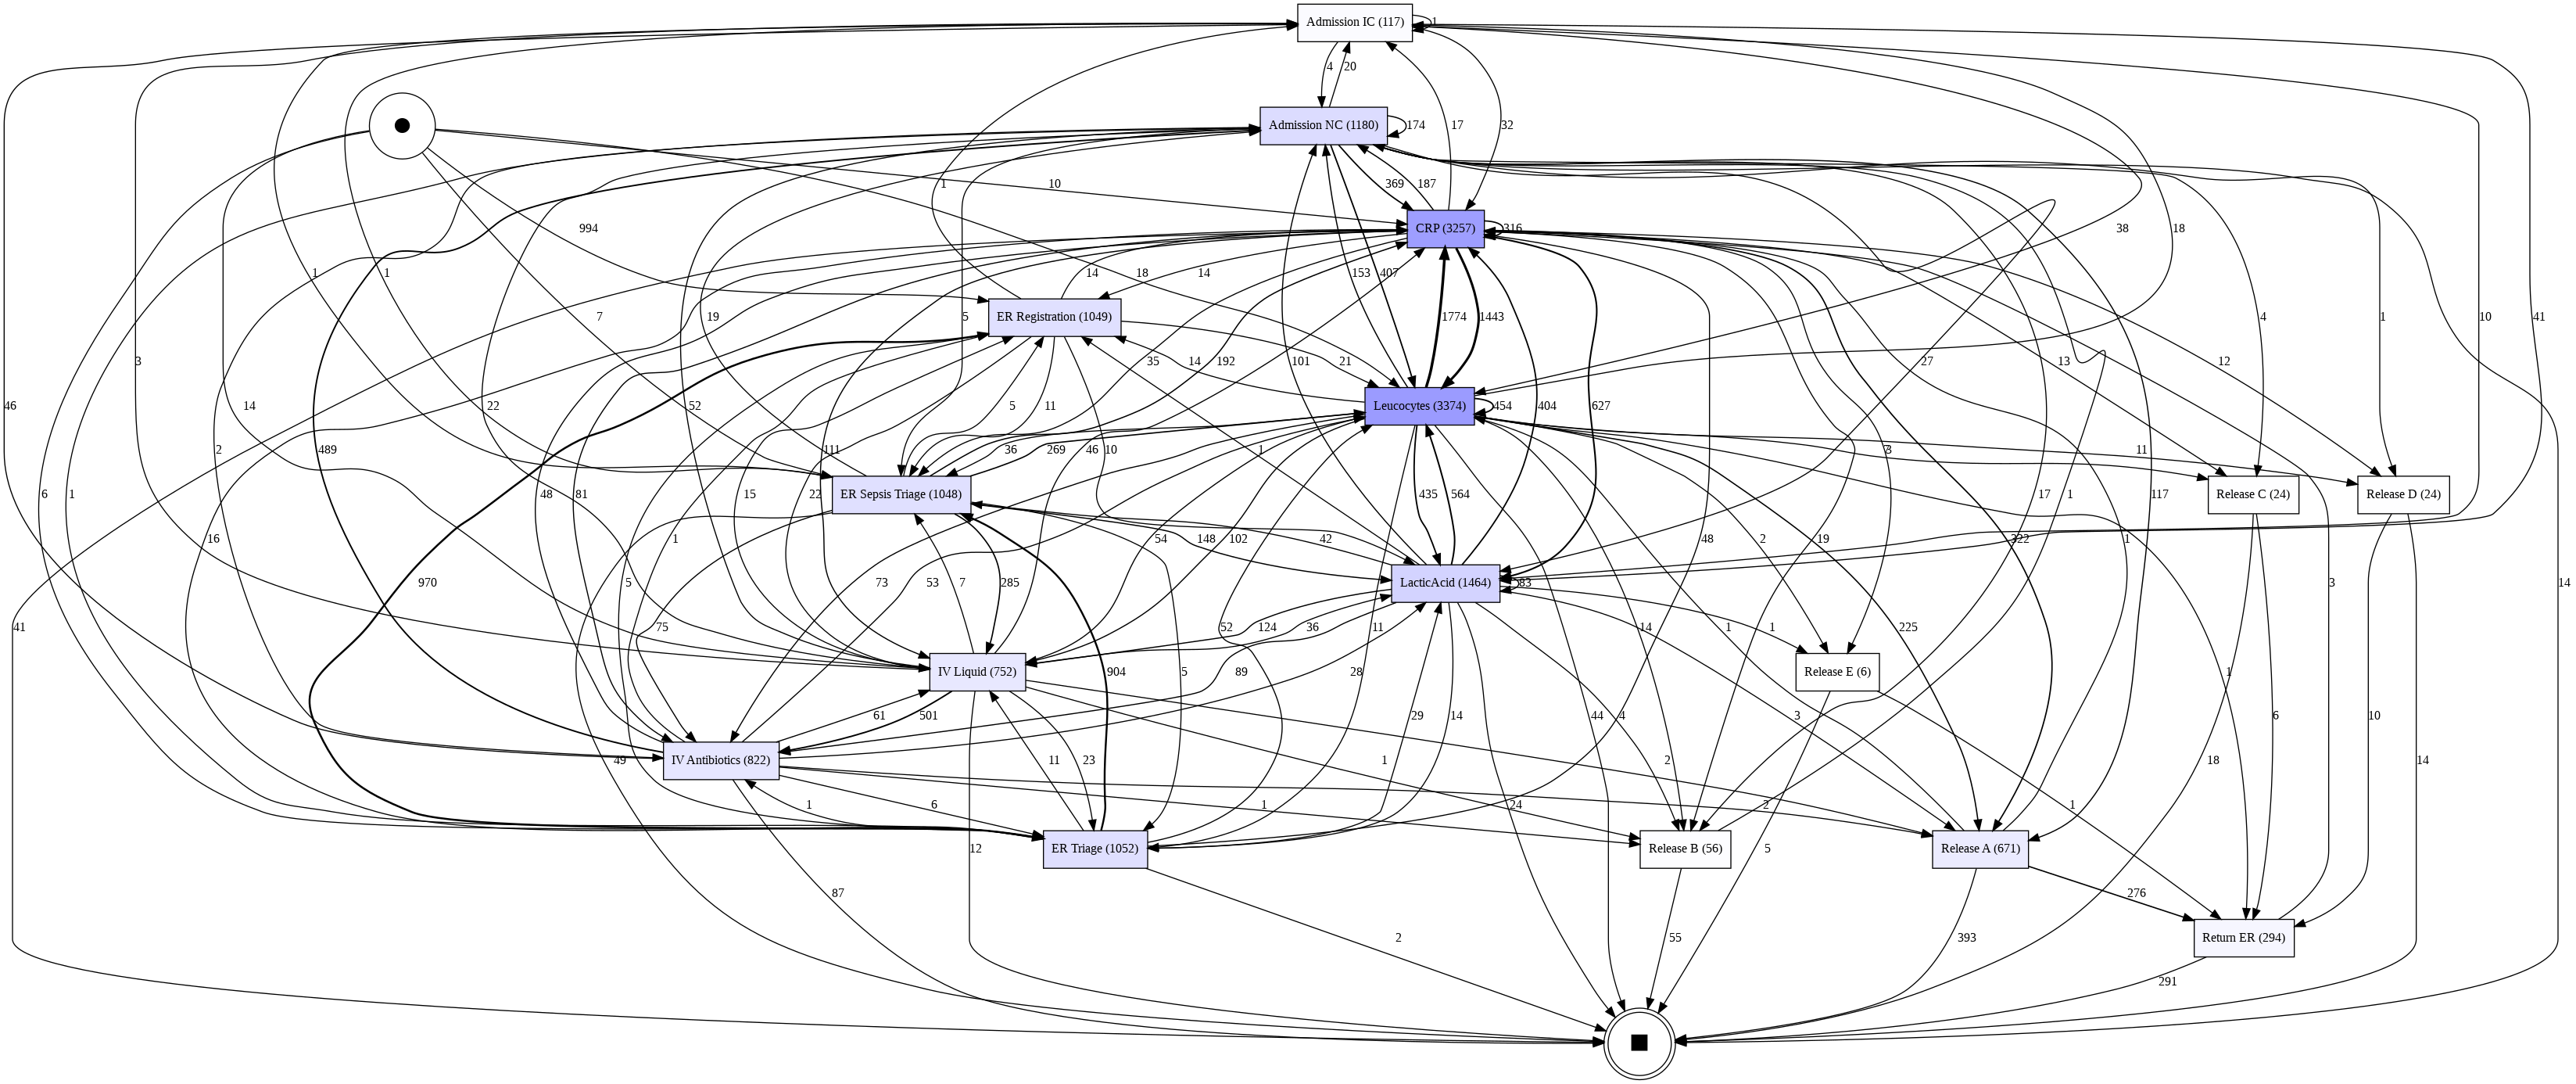

In [ ]:
dfg, initial_activities, final_activities = pm4py.discover_dfg(df)
pm4py.view_dfg(dfg, initial_activities, final_activities)

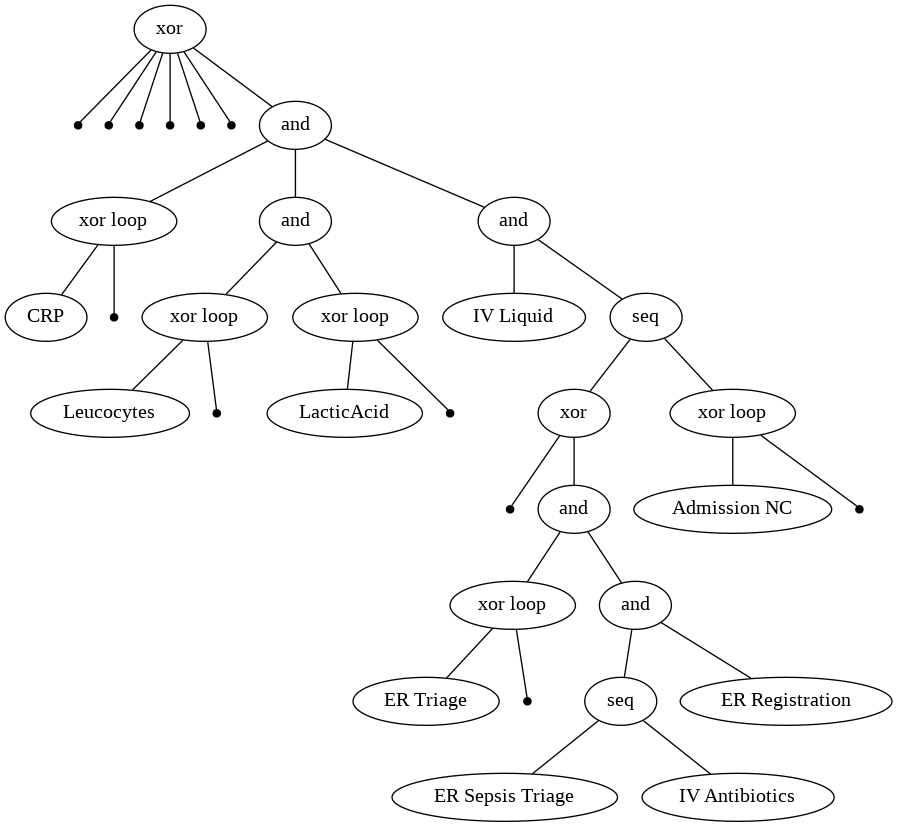

In [ ]:
tree = pm4py.discover_process_tree_inductive(df, 0.8)
pm4py.view_process_tree(tree)

In [ ]:
kn = 31   # If kn >= 32, individual loop events will occur

df_top_kn = pm4py.filtering.filter_variants_top_k(df, kn)
for cv in pm4py.stats.get_variants(df_top_kn).keys():
  print(cv)

('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'LacticAcid', 'CRP', 'IV Liquid', 'IV Antibiotics')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'CRP', 'LacticAcid', 'Leucocytes', 'IV Liquid', 'IV Antibiotics')
('ER Registration', 'ER Triage', 'ER Sepsis Triage')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'CRP')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'Leucocytes', 'CRP', 'LacticAcid')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'CRP', 'LacticAcid', 'Leucocytes')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'IV Liquid', 'Leucocytes', 'CRP', 'LacticAcid', 'IV Antibiotics', 'Admission NC', 'Leucocytes', 'CRP', 'Release A', 'Return ER')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'CRP', 'Leucocytes', 'Admission NC', 'Release A')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'CRP', 'Leucocytes', 'LacticAcid', 'IV Liquid', 'IV Antibiotics')
('ER Registration', 'ER Triage', 'ER Sepsis Triage', 'C

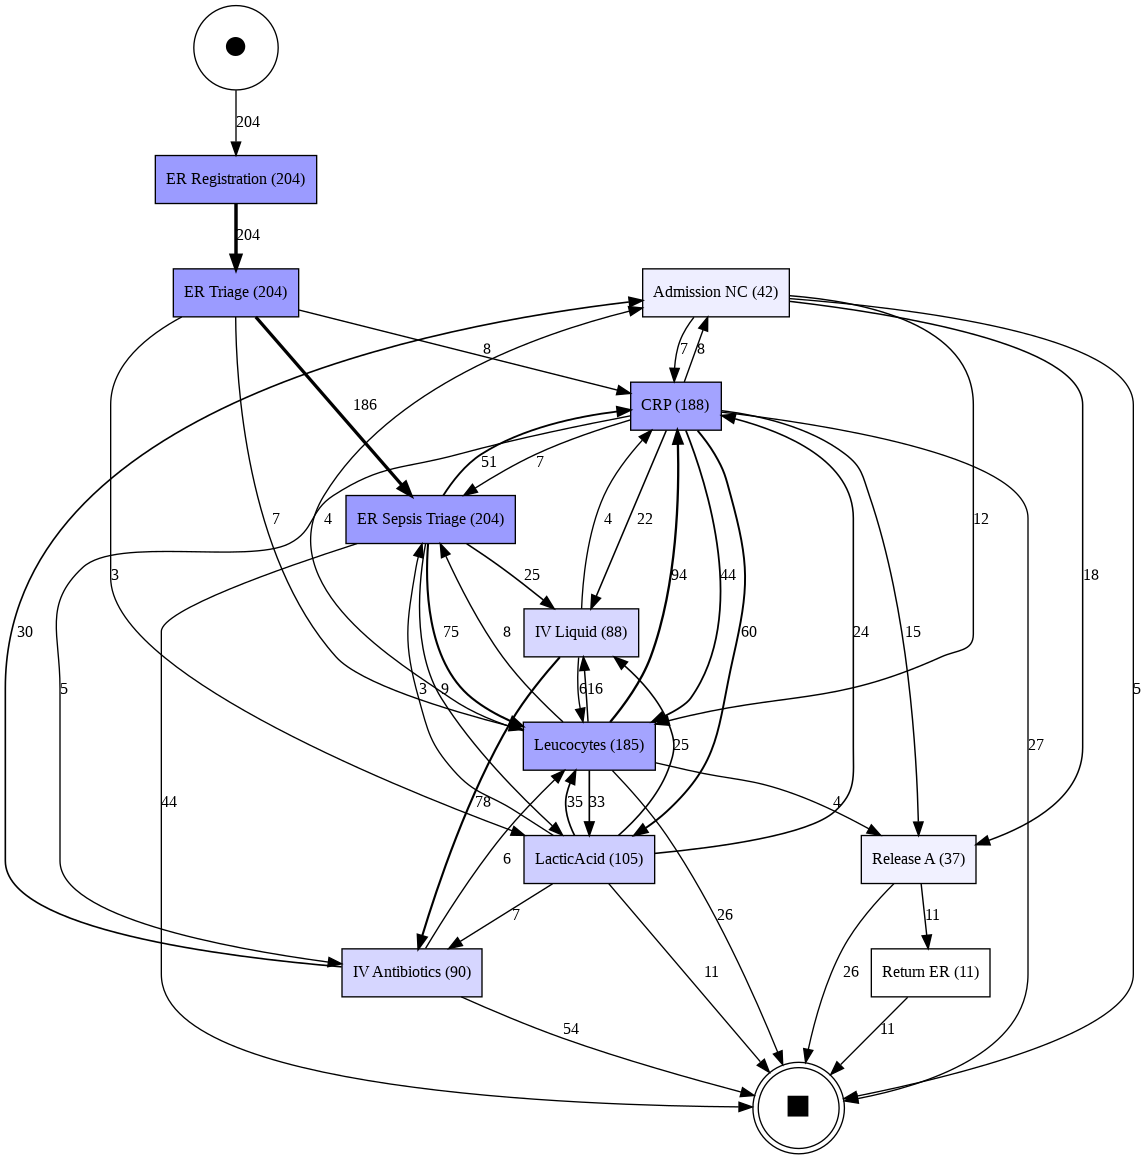

In [ ]:
pm4py.view_dfg(*pm4py.discover_dfg(df_top_kn))


# The process map indicates two short loops ("CRP <=> LacticAcid", "CRP <=> Leucocytes", "LacticAcid <=> Leucocytes") in the reduced event log df_top_kn.

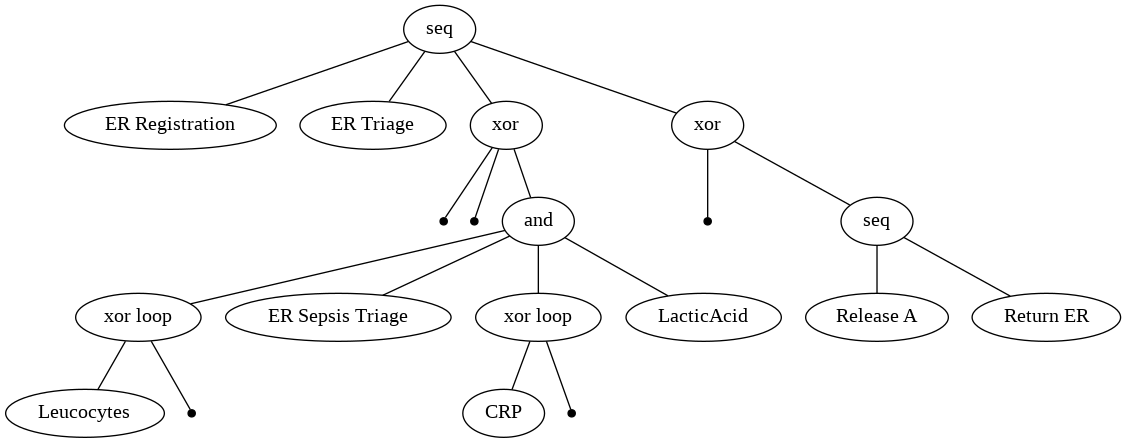

In [ ]:
tree = pm4py.discover_process_tree_inductive(df_top_kn, 0.8)
pm4py.view_process_tree(tree)

In [ ]:
## 3. What is/are the main differences between Release B and other types of patient releases (Release A, C, D, etc.)? (2 points)

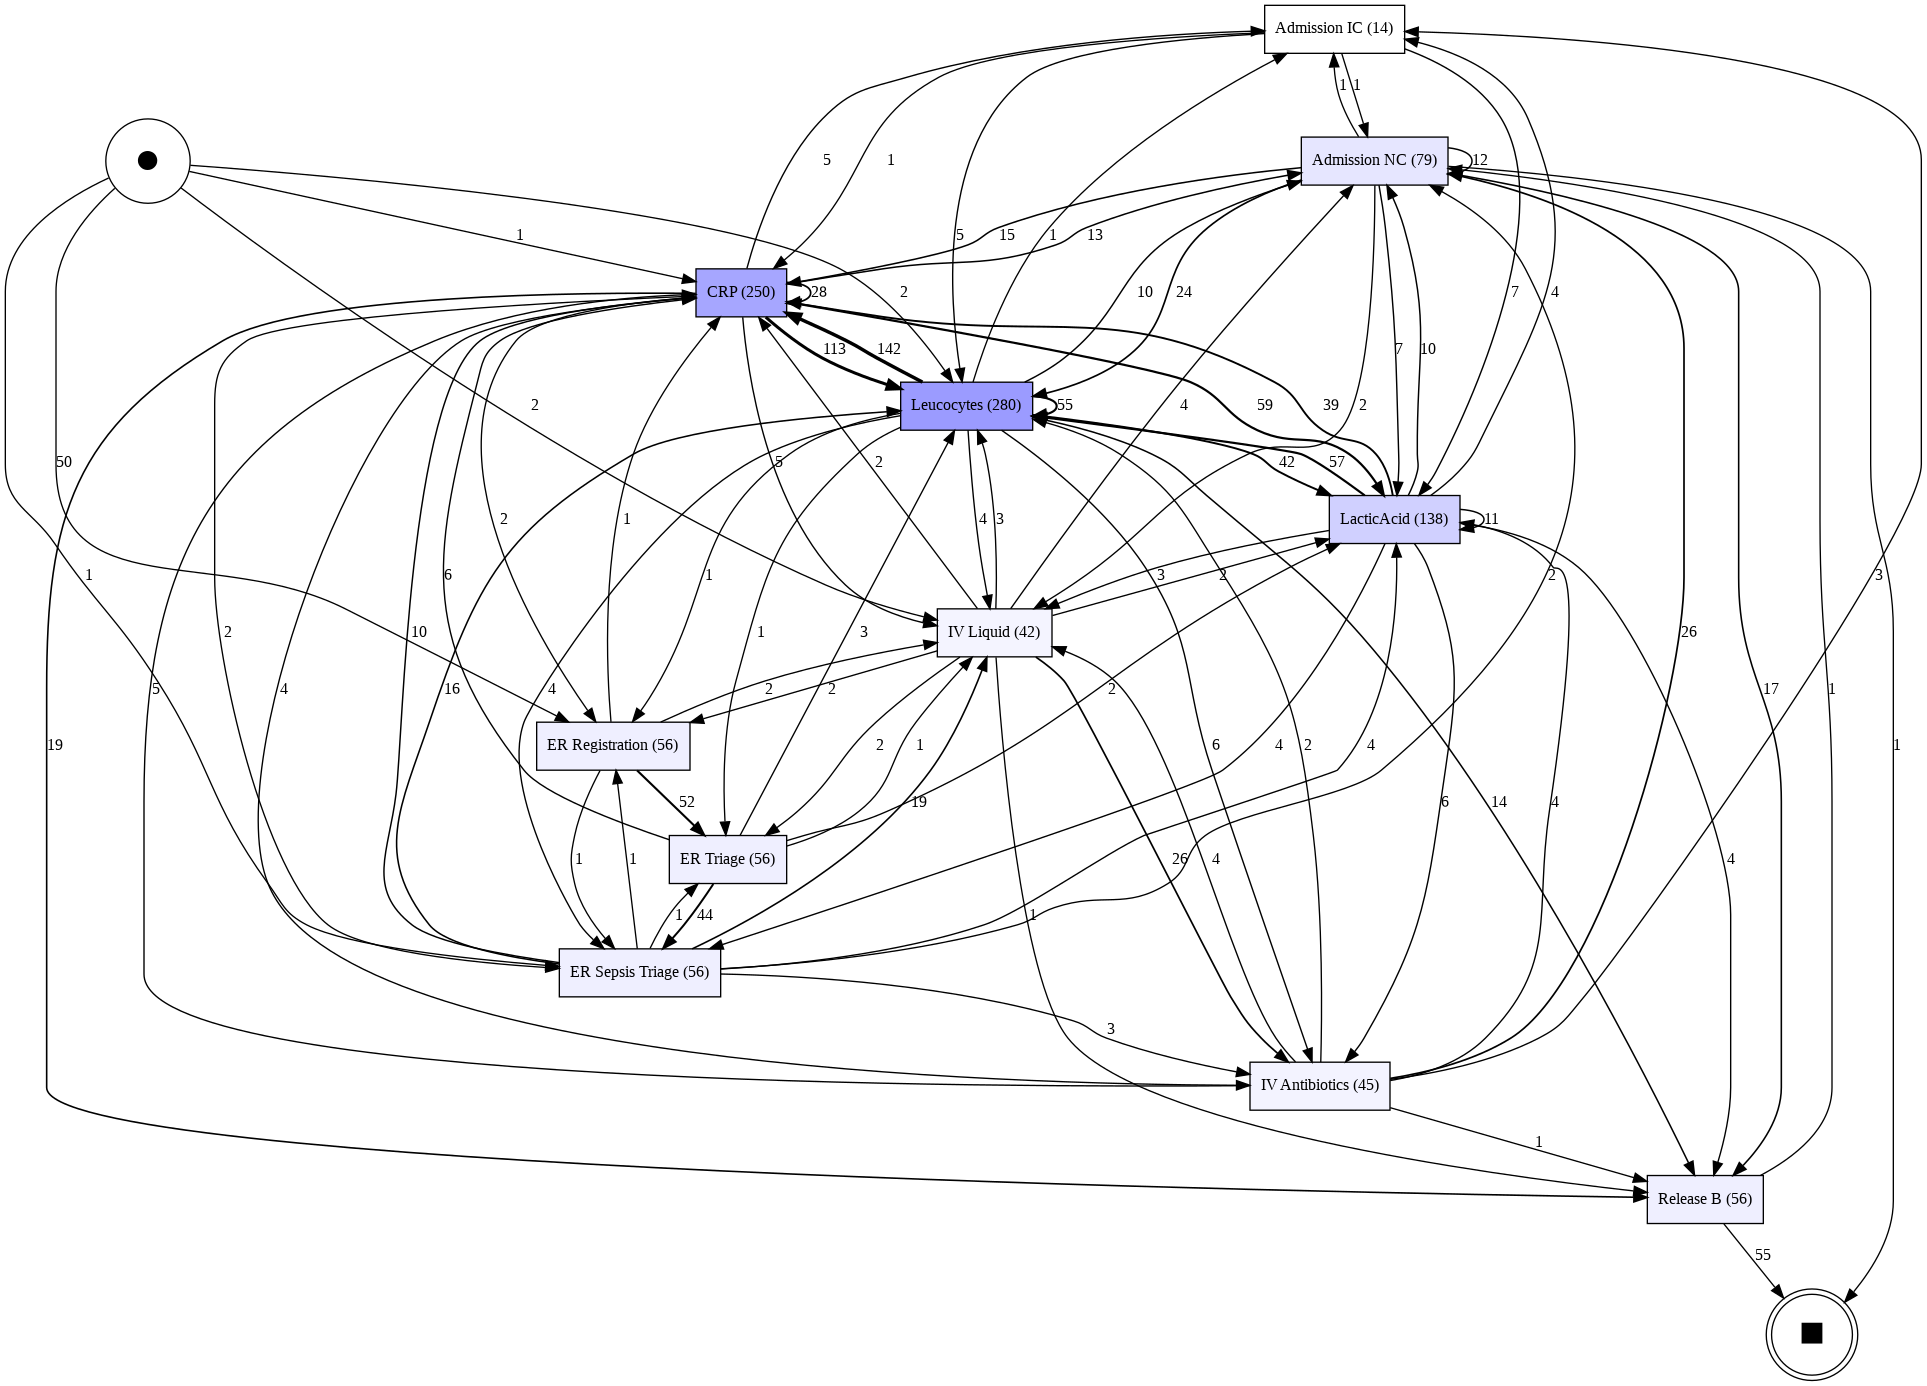

In [ ]:
# 找到包含 "Release B" 的 Case ID
release_b_cases = df[df['Activity'].str.contains('Release B')]['Case ID'].unique()

# 筛选包含 "Release B" 的整个 Case
filtered_b_cases = df[df['Case ID'].isin(release_b_cases)]

pm4py.view_dfg(*pm4py.discover_dfg(filtered_b_cases))

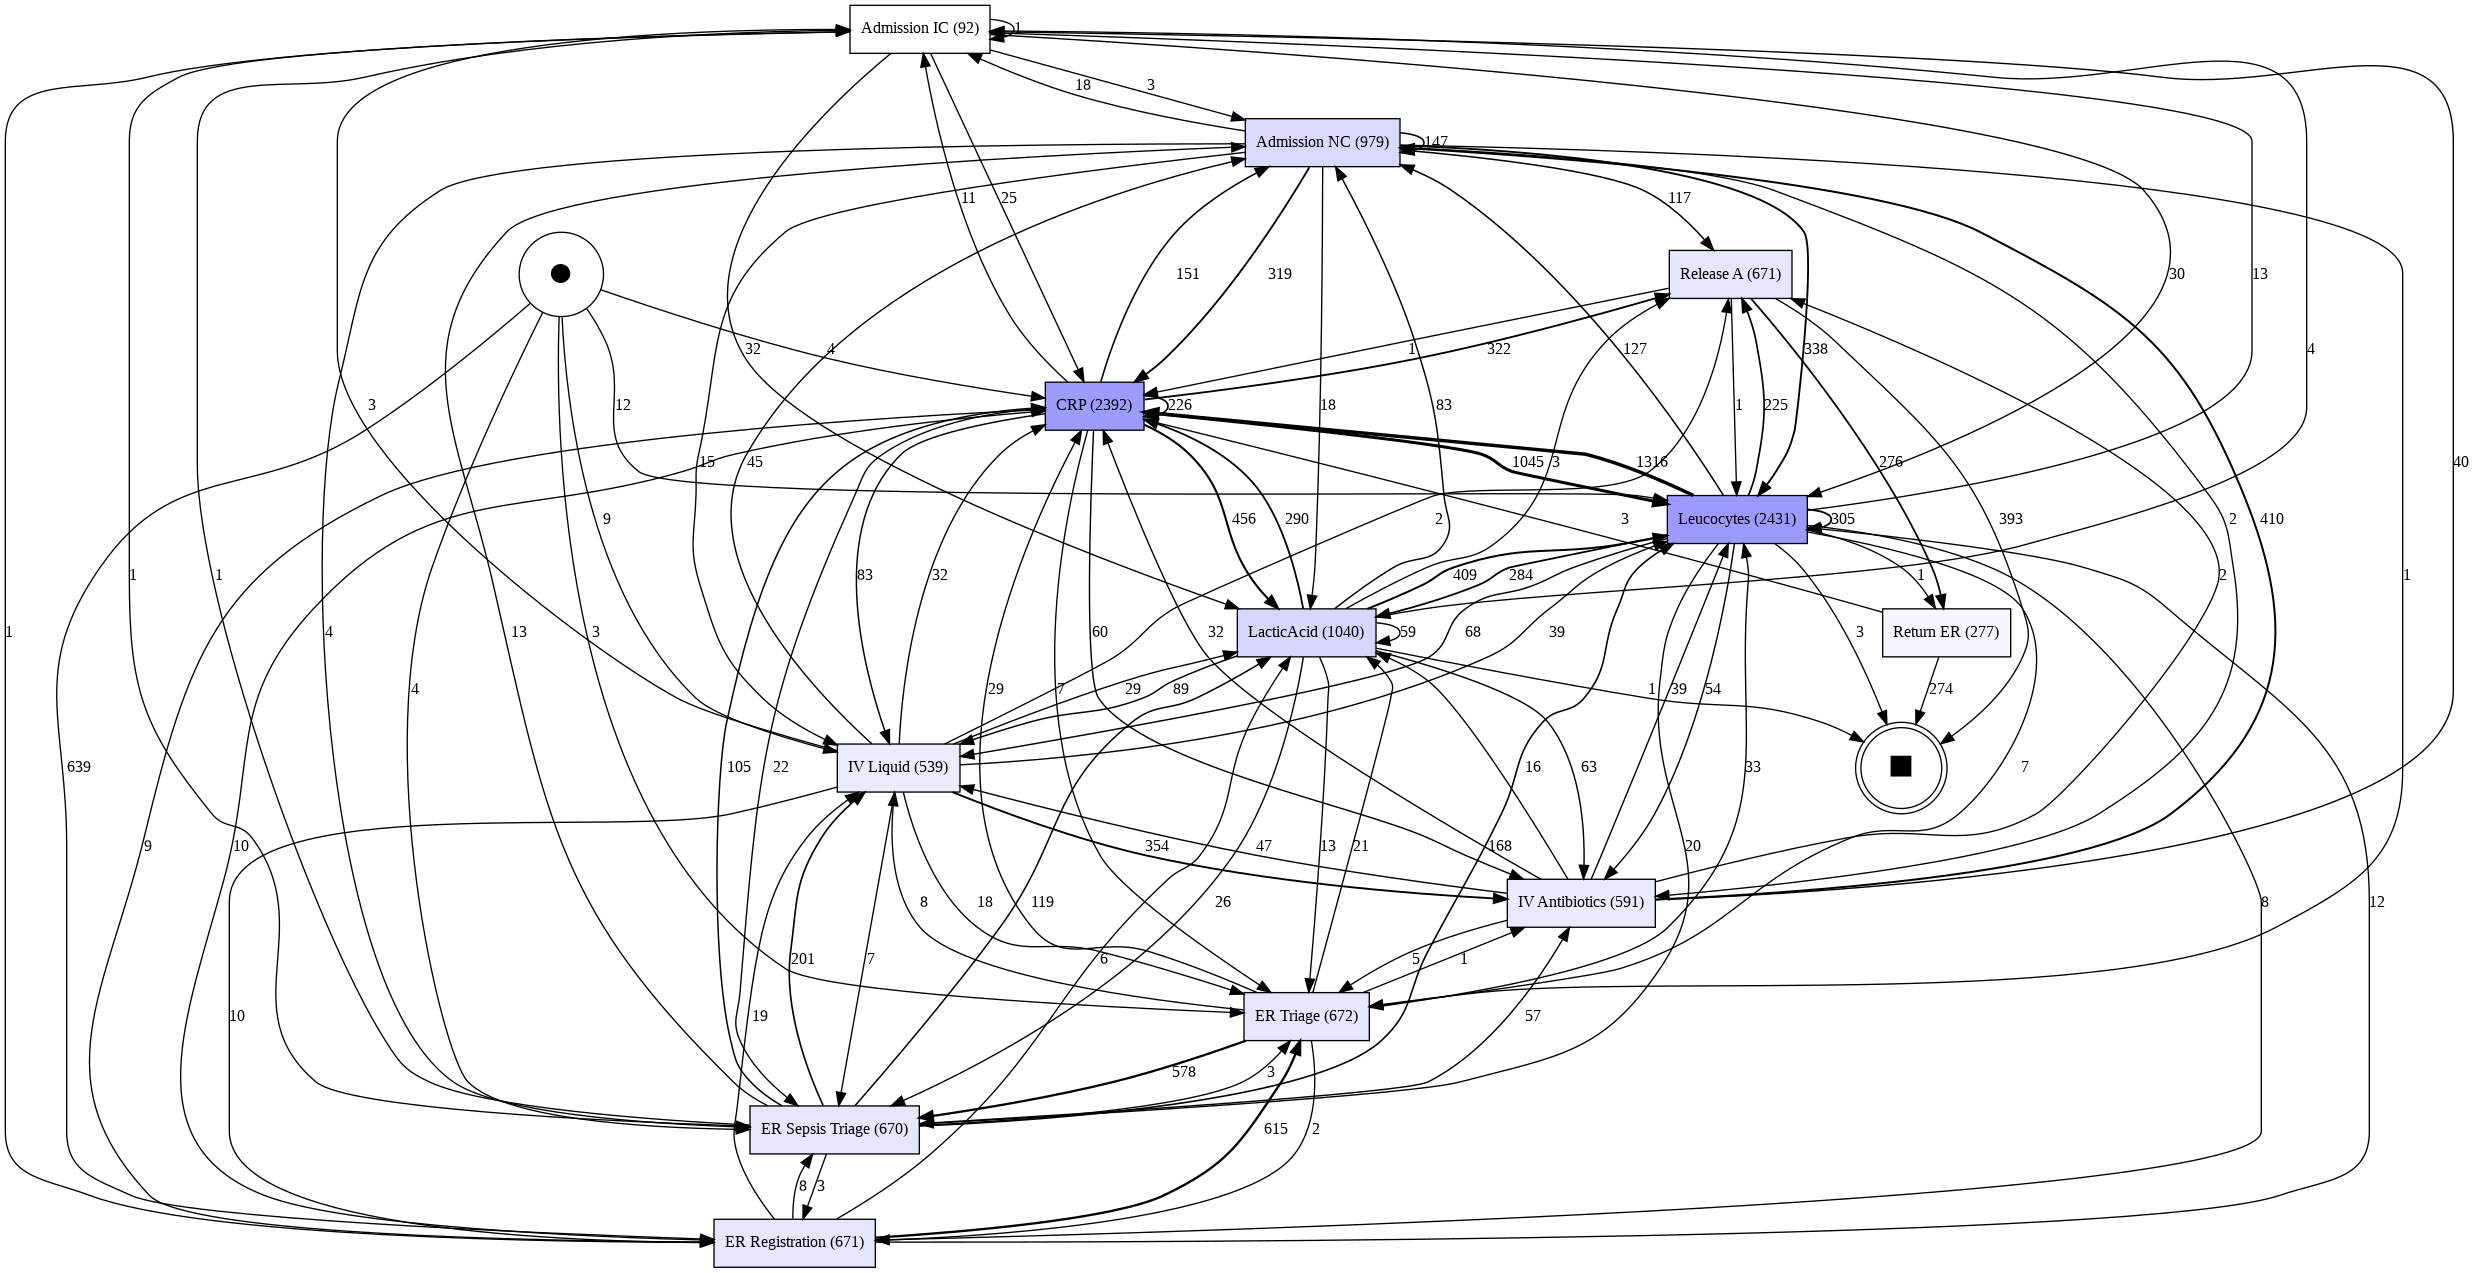

In [ ]:
# 找到包含 "Release A" 的 Case ID
release_a_cases = df[df['Activity'].str.contains('Release A')]['Case ID'].unique()

# 筛选包含 "Release A" 的整个 Case
filtered_a_cases = df[df['Case ID'].isin(release_a_cases)]

pm4py.view_dfg(*pm4py.discover_dfg(filtered_a_cases))

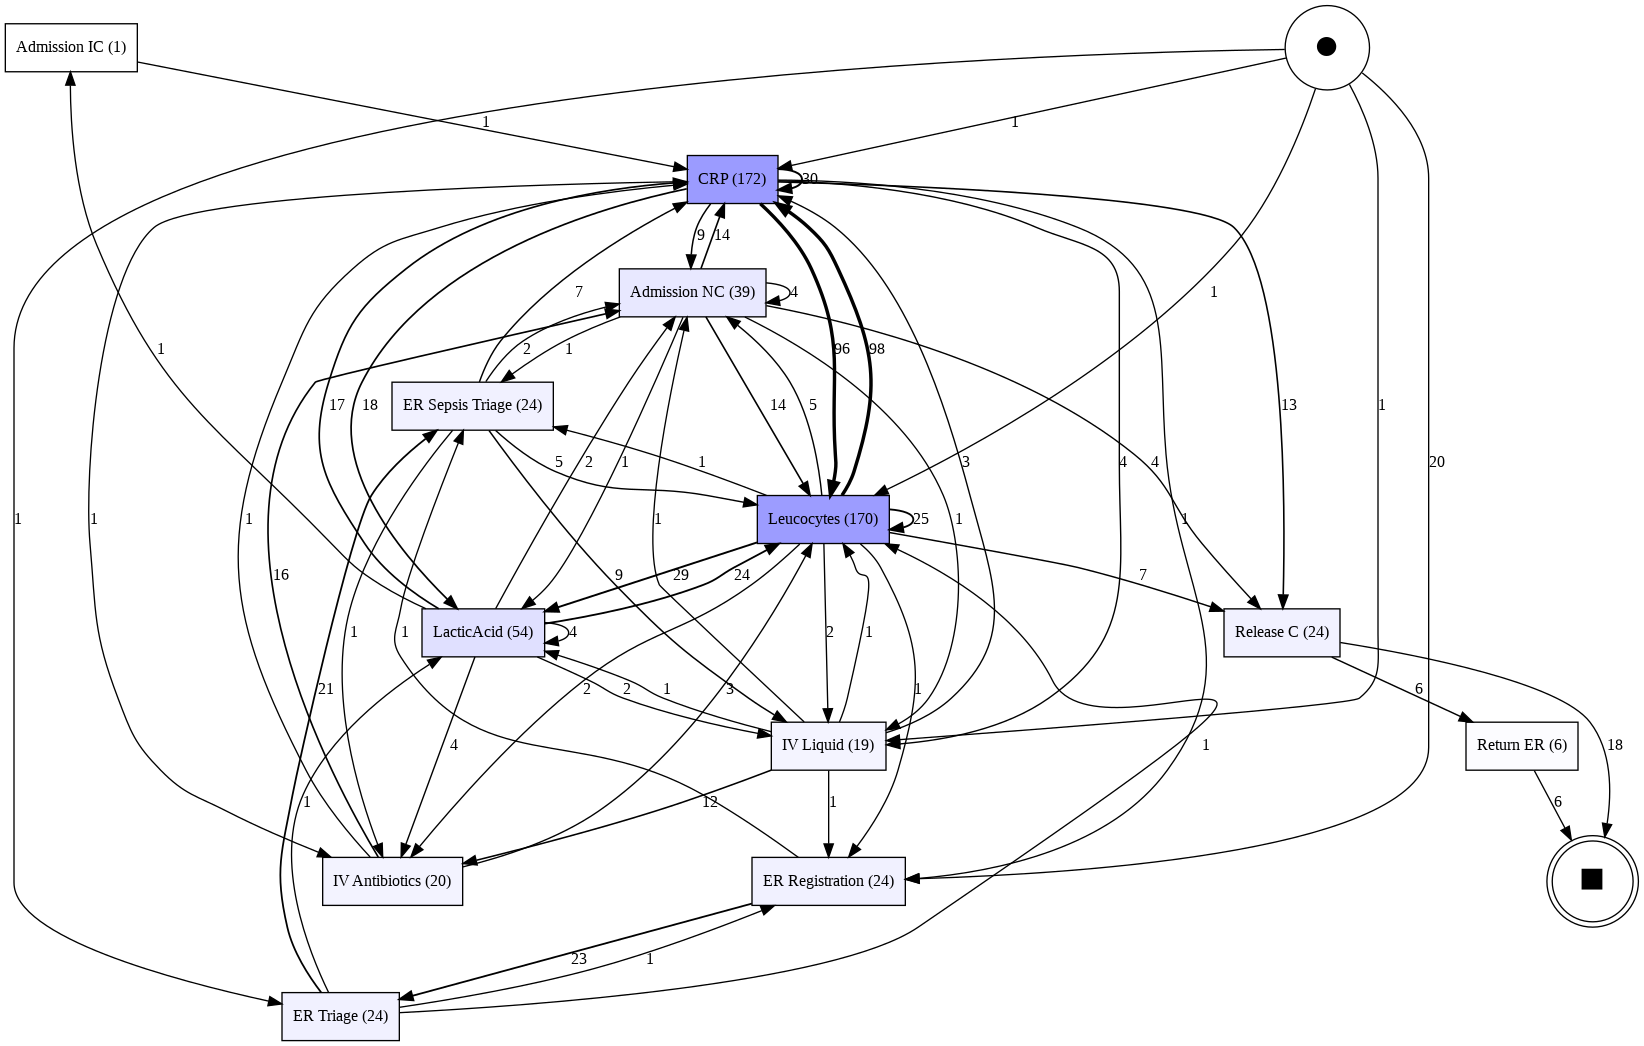

In [ ]:
# 找到包含 "Release C" 的 Case ID
release_c_cases = df[df['Activity'].str.contains('Release C')]['Case ID'].unique()

# 筛选包含 "Release C" 的整个 Case
filtered_c_cases = df[df['Case ID'].isin(release_c_cases)]

pm4py.view_dfg(*pm4py.discover_dfg(filtered_c_cases))

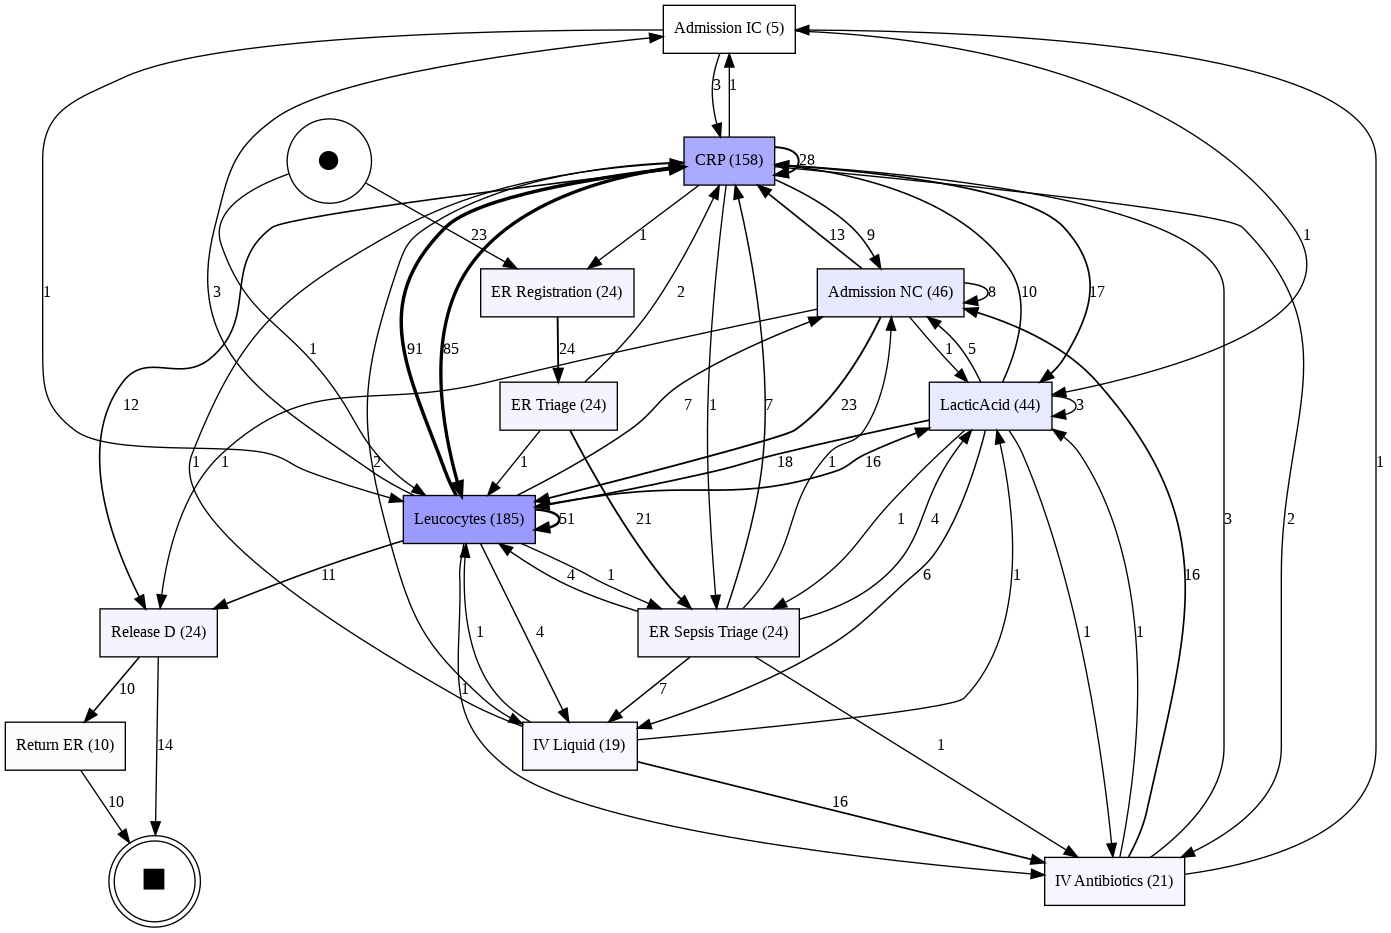

In [ ]:
# 找到包含 "Release D" 的 Case ID
release_d_cases = df[df['Activity'].str.contains('Release D')]['Case ID'].unique()

# 筛选包含 "Release D" 的整个 Case
filtered_d_cases = df[df['Case ID'].isin(release_d_cases)]

pm4py.view_dfg(*pm4py.discover_dfg(filtered_d_cases))

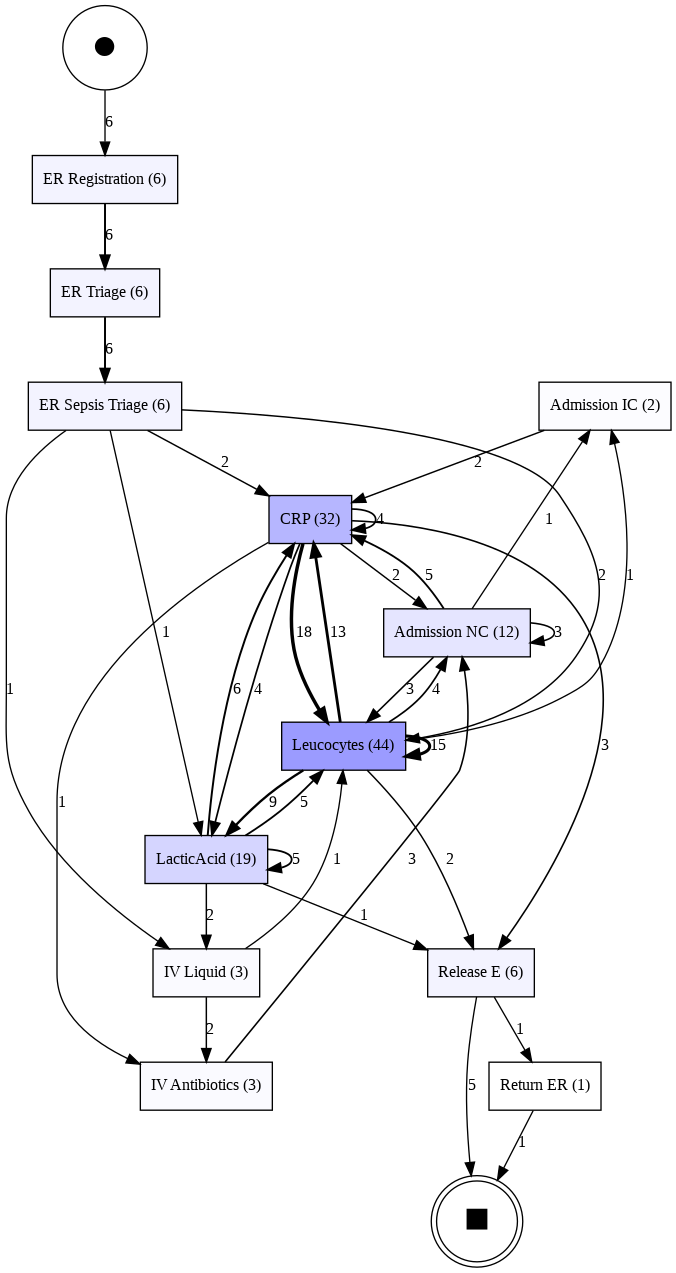

In [ ]:
# 找到包含 "Release E" 的 Case ID
release_e_cases = df[df['Activity'].str.contains('Release E')]['Case ID'].unique()

# 筛选包含 "Release E" 的整个 Case
filtered_e_cases = df[df['Case ID'].isin(release_e_cases)]

pm4py.view_dfg(*pm4py.discover_dfg(filtered_e_cases))

1. **Describe the most frequent case variants in this process. (1 point)**<br>
  ('ER Registration', 'ER Triage', 'ER Sepsis Triage')

2. **Which parts of the process get repeated? What are the most frequent loops? (1 point)**<br>
  Take k = 31 (in order to narrow the scope of cases and avoid individual circulation)<br>
  The process map indicates some short loops in the reduced event log df_top_kn.<br>

    *   CRP <=> Admission NC<br>
    *   CRP <=> ER Sepsis Triage<br>
    *   CRP <=> IV Liquid<br>
    *   CRP <=> IV Antibiotics<br>
    *   CRP <=> Leucocytes<br>
    *   CRP <=> LacticAcid<br>
    *   ER Sepsis Triage <=> LacticAcid<br>
    *   ER Sepsis Triage <=> Leucocytes<br>
    *   IV Liquid <=> Leucocytes<br>
    *   LacticAcid <=> Leucocytes<br>
    
  most frequent loops: CRP <=> IV Liquid (94)<br>
<br>
3. **What is/are the main differences between Release B and other types of patient releases (Release A, C, D, etc.)? (2 points)**<br>
Release B will not experience the "Return ER" activity at all.

# 2. Production

1. Which activities are most re-worked? (2 points)

2. What is the longest cycle time? (2 points)

3. If you had to sketch this process to your manager, on the “back of a napkin”, using a boxes-and-arrows diagram with at most 7 boxes, how would you draw it? (2 points)


P.S. cycle time = (complete time of the last activity) - (start time of the first activity)

In [111]:
df = pd.read_csv("https://github.com/chihduo/pmlab/raw/main/2023/data/production.csv", sep = ",")
df.head(5)

Case ID                       Activity                       Resource  \
0  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
1  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
2  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
3  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
4  Case 1         Turning & Milling Q.C.                Quality Check 1   

           Start Timestamp       Complete Timestamp    Span  Work Order  Qty  \
0  2012/01/29 23:24:00.000  2012/01/30 05:43:00.000  006:19               10   
1  2012/01/30 05:44:00.000  2012/01/30 06:42:00.000  000:58               10   
2  2012/01/30 06:59:00.000  2012/01/30 07:21:00.000  000:22               10   
3  2012/01/30 07:21:00.000  2012/01/30 10:58:00.000  003:37               10   
4  2012/01/31 13:20:00.000  2012/01/31 14:50:00.000  001:30               10   

   Part Desc. Worker ID Report Type  Qty Completed  Qty Rejected  Qty for MRB  \
0  Cable Head    ID4932           S              1             0            0   
1  Cable Head    ID4932           D              1             0            0   
2  Cable Head    ID4167           S              0             0            0   
3  Cable Head    ID4167           D              8             0            0   
4  Cable Head    ID4163           D              9             1            0   

  Rework  
0    NaN  
1    NaN  
2    NaN  
3    NaN  
4    NaN

In [112]:
# TODO: convert the timestamp fields to the Datetime datatype

df['Start Timestamp'] = pd.to_datetime(df['Start Timestamp'])
df['Complete Timestamp'] = pd.to_datetime(df['Complete Timestamp'])

In [113]:
df = pm4py.format_dataframe(df, case_id="Case ID",activity_key="Activity", timestamp_key="Complete Timestamp")
df.head(5)

Case ID                       Activity                       Resource  \
0  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
1  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
2  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
3  Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
4  Case 1         Turning & Milling Q.C.                Quality Check 1   

      Start Timestamp  Complete Timestamp    Span  Work Order  Qty  \
0 2012-01-29 23:24:00 2012-01-30 05:43:00  006:19               10   
1 2012-01-30 05:44:00 2012-01-30 06:42:00  000:58               10   
2 2012-01-30 06:59:00 2012-01-30 07:21:00  000:22               10   
3 2012-01-30 07:21:00 2012-01-30 10:58:00  003:37               10   
4 2012-01-31 13:20:00 2012-01-31 14:50:00  001:30               10   

   Part Desc. Worker ID Report Type  Qty Completed  Qty Rejected  Qty for MRB  \
0  Cable Head    ID4932           S              1             0            0   
1  Cable Head    ID4932           D              1             0            0   
2  Cable Head    ID4167           S              0             0            0   
3  Cable Head    ID4167           D              8             0            0   
4  Cable Head    ID4163           D              9             1            0   

  Rework case:concept:name                   concept:name      time:timestamp  \
0    NaN            Case 1  Turning & Milling - Machine 4 2012-01-30 05:43:00   
1    NaN            Case 1  Turning & Milling - Machine 4 2012-01-30 06:42:00   
2    NaN            Case 1  Turning & Milling - Machine 4 2012-01-30 07:21:00   
3    NaN            Case 1  Turning & Milling - Machine 4 2012-01-30 10:58:00   
4    NaN            Case 1         Turning & Milling Q.C. 2012-01-31 14:50:00   

   @@index  @@case_index  
0        0             0  
1        1             0  
2        2             0  
3        3             0  
4        4             0

## Ans for section 2

In [114]:
## 1. Which activities are most re-worked? (2 points)

df['Next Activity'] = df['Activity'].shift(-1)
df

Case ID                       Activity                       Resource  \
0      Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
1      Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
2      Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
3      Case 1  Turning & Milling - Machine 4  Machine 4 - Turning & Milling   
4      Case 1         Turning & Milling Q.C.                Quality Check 1   
...       ...                            ...                            ...   
4538  Case 99      Laser Marking - Machine 7       Machine 7- Laser Marking   
4539  Case 99            Lapping - Machine 1            Machine 1 - Lapping   
4540  Case 99          Final Inspection Q.C.                Quality Check 1   
4541  Case 99          Final Inspection Q.C.                Quality Check 1   
4542  Case 99                        Packing                        Packing   

         Start Timestamp  Complete Timestamp    Span  Work Order  Qty  \
0    2012-01-29 23:24:00 2012-01-30 05:43:00  006:19               10   
1    2012-01-30 05:44:00 2012-01-30 06:42:00  000:58               10   
2    2012-01-30 06:59:00 2012-01-30 07:21:00  000:22               10   
3    2012-01-30 07:21:00 2012-01-30 10:58:00  003:37               10   
4    2012-01-31 13:20:00 2012-01-31 14:50:00  001:30               10   
...                  ...                 ...     ...              ...   
4538 2012-03-26 09:14:00 2012-03-26 10:12:00  000:58              507   
4539 2012-03-26 10:12:00 2012-03-26 12:12:00  002:00              507   
4540 2012-03-28 17:35:00 2012-03-28 17:59:00  000:24              507   
4541 2012-03-29 08:00:00 2012-03-29 11:54:00  003:54              507   
4542 2012-03-30 00:00:00 2012-03-30 01:00:00  000:00              507   

      Part Desc. Worker ID Report Type  Qty Completed  Qty Rejected  \
0     Cable Head    ID4932           S              1             0   
1     Cable Head    ID4932           D              1             0   
2     Cable Head    ID4167           S              0             0   
3     Cable Head    ID4167           D              8             0   
4     Cable Head    ID4163           D              9             1   
...          ...       ...         ...            ...           ...   
4538       Drill    ID0998           D            160             0   
4539       Drill    ID0998           D            160             0   
4540       Drill    ID4618           D              0             0   
4541       Drill    ID4618           D            160             0   
4542       Drill    ID4820           D            160             0   

      Qty for MRB Rework case:concept:name                   concept:name  \
0               0    NaN            Case 1  Turning & Milling - Machine 4   
1               0    NaN            Case 1  Turning & Milling - Machine 4   
2               0    NaN            Case 1  Turning & Milling - Machine 4   
3               0    NaN            Case 1  Turning & Milling - Machine 4   
4               0    NaN            Case 1         Turning & Milling Q.C.   
...           ...    ...               ...                            ...   
4538            0    NaN           Case 99      Laser Marking - Machine 7   
4539            0    NaN           Case 99            Lapping - Machine 1   
4540            0    NaN           Case 99          Final Inspection Q.C.   
4541            0    NaN           Case 99          Final Inspection Q.C.   
4542            0    NaN           Case 99                        Packing   

          time:timestamp  @@index  @@case_index                  Next Activity  
0    2012-01-30 05:43:00        0             0  Turning & Milling - Machine 4  
1    2012-01-30 06:42:00        1             0  Turning & Milling - Machine 4  
2    2012-01-30 07:21:00        2             0  Turning & Milling - Machine 4  
3    2012-01-30 10:58:00        3             0         Turning & Milling Q.C.

In [115]:
filter1 = (df['Next Activity'] == df['Activity'])
filtered_df = df[filter1]
filtered_df["Activity"].value_counts().head(5)


Final Inspection Q.C.            198
Turning & Milling - Machine 6    174
Turning & Milling - Machine 5    174
Round Grinding - Machine 3       173
Turning & Milling - Machine 4    167
Name: Activity, dtype: int64

In [116]:
## 2. What is the longest cycle time? (2 points)
cucle_time_df = pd.DataFrame()

cucle_time_df['Case ID'] = df['Case ID'].unique()
cucle_time_start = df.groupby('Case ID')['Start Timestamp'].min().reset_index()
cucle_time_end = df.groupby('Case ID')['Complete Timestamp'].max().reset_index()

cucle_time_df = cucle_time_df.merge(cucle_time_start, on=['Case ID'], how='inner')
cucle_time_df = cucle_time_df.merge(cucle_time_end, on=['Case ID'], how='inner')
cucle_time_df['Cycle Time'] = cucle_time_df['Complete Timestamp'] - cucle_time_df['Start Timestamp']

cucle_time_df

Case ID     Start Timestamp  Complete Timestamp       Cycle Time
0      Case 1 2012-01-29 23:24:00 2012-02-17 01:00:00 18 days 01:36:00
1     Case 10 2012-01-17 07:01:00 2012-02-03 01:00:00 16 days 17:59:00
2    Case 100 2012-02-20 17:09:00 2012-03-21 07:03:00 29 days 13:54:00
3    Case 101 2012-03-13 18:47:00 2012-03-26 01:00:00 12 days 06:13:00
4    Case 102 2012-02-27 16:40:00 2012-03-14 01:00:00 15 days 08:20:00
..        ...                 ...                 ...              ...
220   Case 95 2012-02-27 14:06:00 2012-03-30 01:00:00 31 days 10:54:00
221   Case 96 2012-03-18 12:00:00 2012-03-29 08:40:00 10 days 20:40:00
222   Case 97 2012-03-09 11:30:00 2012-03-22 08:40:00 12 days 21:10:00
223   Case 98 2012-03-28 10:00:00 2012-03-29 09:30:00  0 days 23:30:00
224   Case 99 2012-03-22 11:59:00 2012-03-30 01:00:00  7 days 13:01:00

[225 rows x 4 columns]

In [117]:
cucle_time_df[(cucle_time_df['Cycle Time'] == cucle_time_df['Cycle Time'].max())]

Case ID Start Timestamp  Complete Timestamp       Cycle Time
76  Case 199      2012-01-03 2012-03-30 10:55:00 87 days 10:55:00

In [118]:
## 3. If you had to sketch this process to your manager, on the “back of a napkin”, using a boxes-and-arrows diagram with at most 7 boxes, how would you draw it? (2 points)

tidy_df = pd.read_csv("https://github.com/chihduo/pmlab/raw/main/2023/data/production.csv", sep = ",")
tidy_df.head(5)

# 用正則表達是替換指定模式的字串
tidy_df['Activity'] = tidy_df['Activity'].str.replace(r' - Machine \d+', '')
tidy_df['Activity'] = tidy_df['Activity'].str.replace(r'.*\sQ.C\..*', 'Quality Check')
tidy_df['Activity'] = tidy_df['Activity'].str.replace(r'.*Fix.*', 'Fix')
tidy_df['Activity'] = tidy_df['Activity'].str.replace('Rework', '').str.strip()
tidy_df['Activity'] = tidy_df['Activity'].str.replace(r' - Manual', '')
tidy_df['Activity'] = tidy_df['Activity'].str.replace(r'.*Grinding', 'Grinding')

# 去除一些少出現 且相對不重要的活動
# filter = (tidy_df['Activity'].str.startswith('SETUP')) | (tidy_df['Activity'].str.contains('Setup')) | (tidy_df['Activity'].str.startswith('Fix')) | (tidy_df['Activity'].str.startswith('Final ')) | (tidy_df['Activity'].str.contains('Change Version')) | (tidy_df['Activity'].str.contains('Stress Relief')) | (tidy_df['Activity'].str.contains('Deburring'))
# tidy_df = tidy_df[~ filter]

# 使用 value_counts() 計算每個值的出現次數
activity_counts = tidy_df['Activity'].value_counts()

# 建立布林 Series 找出出現超過 50 次的
filter_condition = activity_counts > 50

# 使用 isin() 方法過濾出現超過 50 次的值
tidy_df = tidy_df[tidy_df['Activity'].isin(activity_counts[filter_condition].index)]

# TODO: convert the timestamp fields to the Datetime datatype

tidy_df['Start Timestamp'] = pd.to_datetime(tidy_df['Start Timestamp'])
tidy_df['Complete Timestamp'] = pd.to_datetime(tidy_df['Complete Timestamp'])

tidy_df = pm4py.format_dataframe(tidy_df, case_id="Case ID",activity_key="Activity", timestamp_key="Complete Timestamp")
tidy_df.head(5)

Case ID           Activity                       Resource  \
0  Case 1  Turning & Milling  Machine 4 - Turning & Milling   
1  Case 1  Turning & Milling  Machine 4 - Turning & Milling   
2  Case 1  Turning & Milling  Machine 4 - Turning & Milling   
3  Case 1  Turning & Milling  Machine 4 - Turning & Milling   
4  Case 1      Quality Check                Quality Check 1   

      Start Timestamp  Complete Timestamp    Span  Work Order  Qty  \
0 2012-01-29 23:24:00 2012-01-30 05:43:00  006:19               10   
1 2012-01-30 05:44:00 2012-01-30 06:42:00  000:58               10   
2 2012-01-30 06:59:00 2012-01-30 07:21:00  000:22               10   
3 2012-01-30 07:21:00 2012-01-30 10:58:00  003:37               10   
4 2012-01-31 13:20:00 2012-01-31 14:50:00  001:30               10   

   Part Desc. Worker ID Report Type  Qty Completed  Qty Rejected  Qty for MRB  \
0  Cable Head    ID4932           S              1             0            0   
1  Cable Head    ID4932           D              1             0            0   
2  Cable Head    ID4167           S              0             0            0   
3  Cable Head    ID4167           D              8             0            0   
4  Cable Head    ID4163           D              9             1            0   

  Rework case:concept:name       concept:name      time:timestamp  @@index  \
0    NaN            Case 1  Turning & Milling 2012-01-30 05:43:00        0   
1    NaN            Case 1  Turning & Milling 2012-01-30 06:42:00        1   
2    NaN            Case 1  Turning & Milling 2012-01-30 07:21:00        2   
3    NaN            Case 1  Turning & Milling 2012-01-30 10:58:00        3   
4    NaN            Case 1      Quality Check 2012-01-31 14:50:00        4   

   @@case_index  
0             0  
1             0  
2             0  
3             0  
4             0

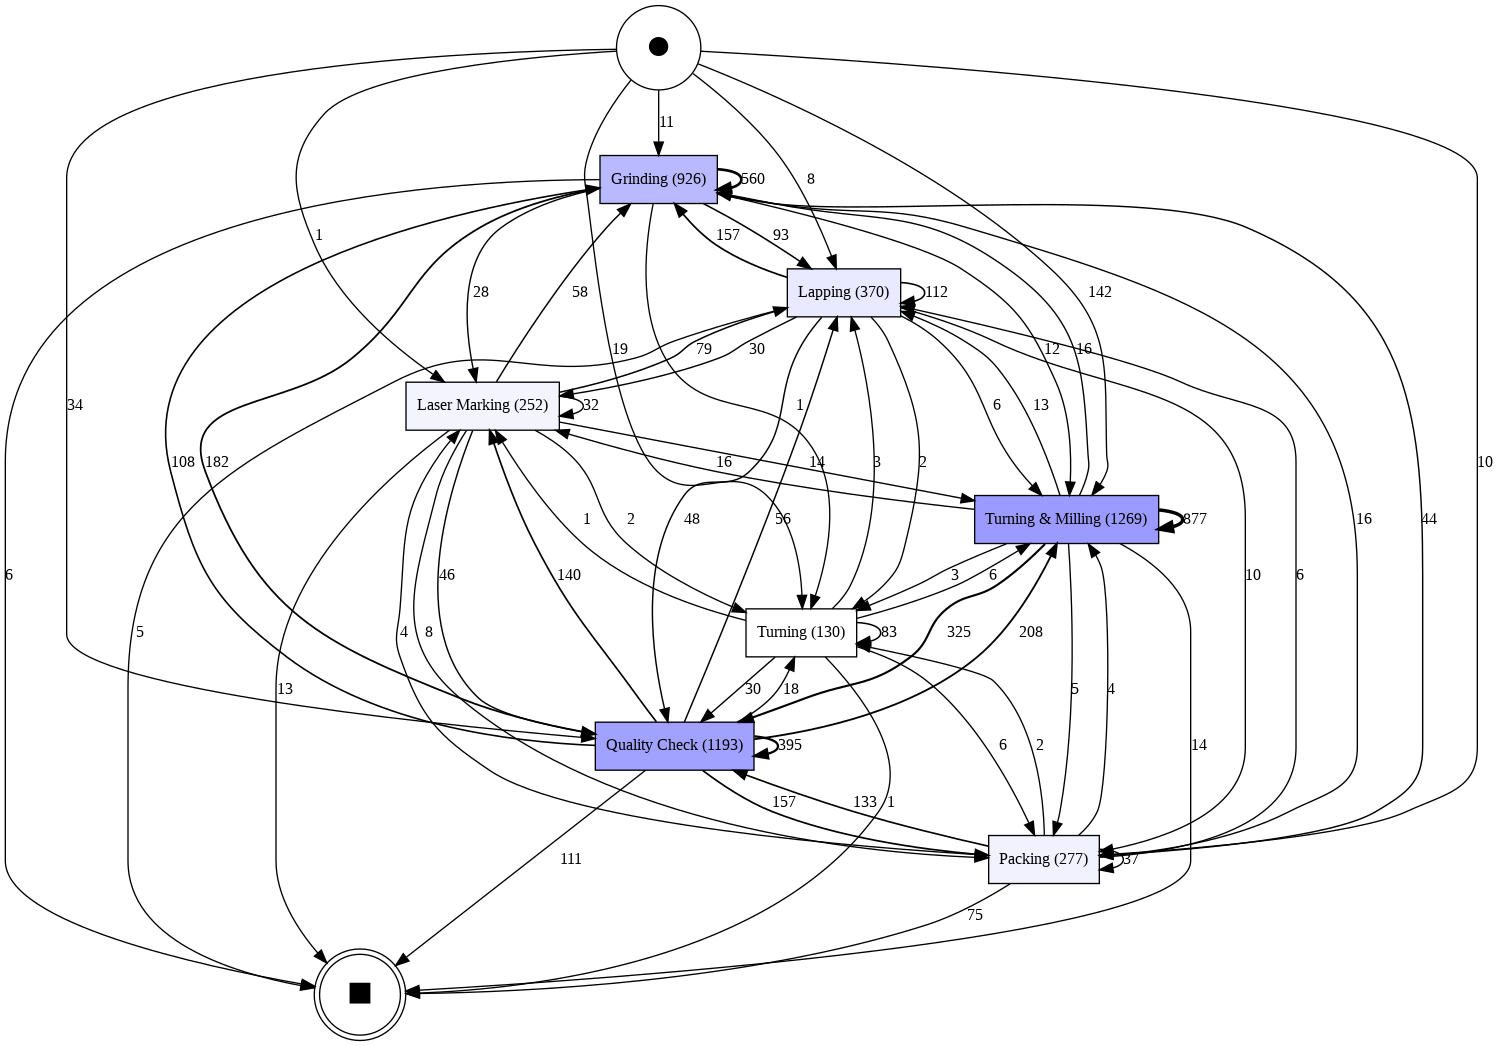

In [119]:
dfg, initial_activities, final_activities = pm4py.discover_dfg(tidy_df)
pm4py.view_dfg(dfg, initial_activities, final_activities)

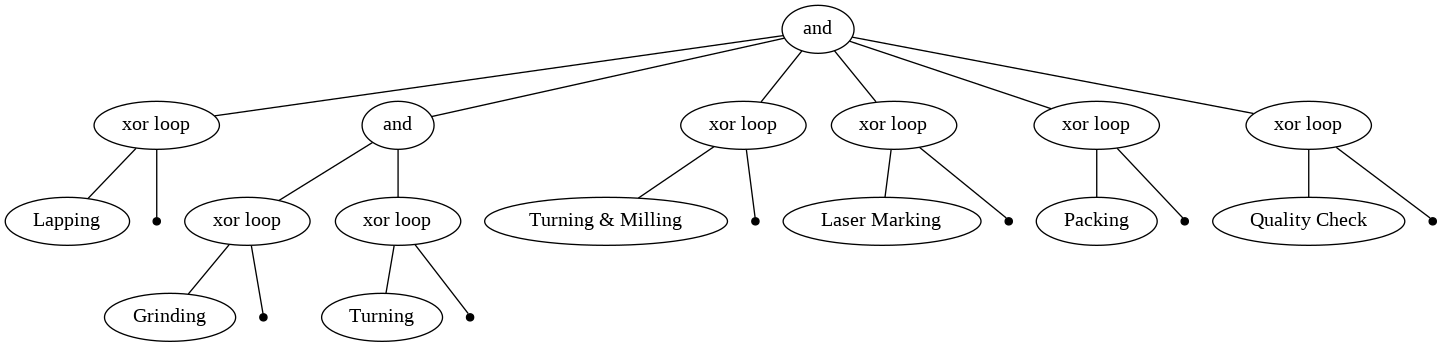

In [120]:
tree = pm4py.discover_process_tree_inductive(tidy_df, 0.8)
pm4py.view_process_tree(tree)

1. **Which activities are most re-worked? (2 points)** <br>
  Final Inspection Q.C

2. **What is the longest cycle time? (2 points)**<br>
  87 days 10:55:00

3. **If you had to sketch this process to your manager, on the “back of a napkin”, using a boxes-and-arrows diagram with at most 7 boxes, how would you draw it? (2 points)**<br>
  As the graph above

# Appendex
Records of the diagramming process, but the image file is too large, so the data was uploaded to the cloud and cut.

[image google drive folder](https://drive.google.com/drive/folders/1b1Y8KfOpnk2OG4XiMtDB5s_5uLIjSYth?usp=sharing)

## NO1: Original process map
The process map is very complex and difficult to understand, and the same process is mapped differently because it uses different machines.

## NO2: De-identify machine differences
Use the following code to delete the machine name in the Activity
> `tidy_df['Activity'] = tidy_df['Activity'].str.replace(r' - Machine \d+', '')`

## NO3: Consolidate Quality Check jobs
QC will be performed after many activities end
Here is another integration method, which is to delete QC directly and regard it as merged into its direct activity.

## NO4: Merge Fix

## NO5: Incorporate rework into the original job to form a loop

## NO6: Integrate grinding series

## NO7: Final Output
Because the question requires that only seven boxes can be drawn, I decided to filted the less frequent activities directly and set the division value to 50.





